Here, we create a simple ETL pipeline using Python. Source data exists in multiple formats (csv, json, xml) in a local directory. We extract amd merge data from 9 files into a dataframe. Then, we carry out a simple transformation and load the transformed data, again, in a local directory. Alongside, we generate a simple log file

**Outline of this notebook:**
1- Extract data from different sources such as:
- csv files
- excel files
- json files
- APIs

2- Transform data
- combining data from different sources
- data cleaning
- data types
- parsing dates
- file encodings
- missing data
- duplicate data
- dummy variables
- remove outliers
- scaling features
- engineering features

3- Load

# **Import Libraries**

In [ ]:
pip install kagglehub

In [ ]:
import numpy as np 
import pandas as pd
from sqlalchemy import create_engine
import sqlite3

# **Extract data from diff sources**

# **Extract from CSV**

Define Each datasource:
- Grocery
- product
- Store status
- sales

In [ ]:
# Path to the file
file_path1 = '/content/walmart_data/WMT_Grocery_202209.csv'
file_path2 = '/content/walmart_data/product.csv'
file_path3 = '/content/walmart_data/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv'

# Read the CSV file
df1 = pd.read_csv(file_path1, on_bad_lines='skip', engine='python', quotechar='"', escapechar='\\', encoding='utf-8')

df1.head()

In [ ]:
print("Columns:", df1.columns)

In [ ]:
# count the number of null values in the data set
df1.isnull().sum()

,0
index,0
SHIPPING_LOCATION,0
DEPARTMENT,0
CATEGORY,0
SUBCATEGORY,20514
BREADCRUMBS,0
SKU,0
PRODUCT_URL,0
PRODUCT_NAME,1
BRAND,1


In [ ]:
# Sum the null values by column
df1.isnull().sum(axis=1)

,0
0,2
1,2
2,2
3,2
4,2
...,...
20509,2
20510,2
20511,2
20512,3


In [ ]:
#  output the shape of the data frame
df1.shape

(20514, 16)

In [ ]:
df2 = pd.read_csv(file_path2)
df2.head()

,timestamp,url,final_price,sku,currency,gtin,specifications,image_urls,top_reviews,rating_stars,...,sizes,colors,seller,other_attributes,customer_reviews,ingredients,initial_price,discount,ingredients_full,categories
0,2024-12-15 00:00:00.000,https://www.walmart.com/ip/Sprite-Zero-Sugar-L...,5.18,21738544,USD,4.900004e+10,"[{""name"":""Flavor"",""value"":""Lemon Lime Soda""},{...","[""https://i5.walmartimages.com/seo/Sprite-Zero...","{""negative"":{""rating"":2,""review"":""I had someon...","{""five_stars"":926,""four_stars"":142,""one_star"":...",...,[],[],Wal███t.c███,"[{""name"":""Instructions"",""value"":""Ready to drin...","[{""name"":""Sha███"",""rating"":5,""review"":""grandso...","CARBONATED WATER, LESS THAN 2% OF: CITRIC ACID...",NaN,NaN,"[{""type"":""Ingredients"",""values"":""CARBONATED WA...","[""Food"",""Beverages"",""Soda Pop"",""Sprite""]"
1,2024-12-15 00:00:00.000,https://www.walmart.com/ip/Sprite-Zero-Lemon-L...,2.12,15610630,USD,4.900005e+10,"[{""name"":""Features"",""value"":""Very low sodium, ...","[""https://i5.walmartimages.com/seo/Sprite-Zero...","{""negative"":{""rating"":1,""review"":""I ORDERED MO...","{""five_stars"":790,""four_stars"":133,""one_star"":...",...,[],[],Wal███t.c███,"[{""name"":""Instructions"",""value"":""Ready to drin...","[{""name"":""Mar███n"",""rating"":5,""review"":""I love...","CARBONATED WATER, LESS THAN 2% OF: CITRIC ACID...",2.68,$0.56,"[{""type"":""Ingredients"",""values"":""CARBONATED WA...","[""Food"",""Beverages"",""Soda Pop"",""Sprite""]"
2,2024-12-15 00:00:00.000,https://www.walmart.com/ip/Sprite-Lemon-Lime-S...,5.52,55455989,USD,4.900000e+10,"[{""name"":""Flavor"",""value"":""Lemon Lime Soda""},{...","[""https://i5.walmartimages.com/seo/Sprite-Lemo...","{""negative"":{""rating"":1,""review"":""perfect if y...","{""five_stars"":5328,""four_stars"":900,""one_star""...",...,[],[],Pri███Par███se,"[{""name"":""Instructions"",""value"":""Ready to drin...","[{""name"":""ari███"",""rating"":5,""review"":""I gener...","CARBONATED WATER, HIGH FRUCTOSE CORN SYRUP, CI...",NaN,NaN,"[{""type"":""Ingredients"",""values"":""CARBONATED WA...","[""Food"",""Beverages"",""Soda Pop"",""Sprite""]"
3,2024-12-15 00:00:00.000,https://www.walmart.com/ip/Hatchimals-Mystery-...,39.00,5298141020,USD,6.811471e+11,"[{""name"":""Features"",""value"":""Interactive""},{""n...","[""https://i5.walmartimages.com/seo/Hatchimals-...","{""negative"":{""rating"":1,""review"":""Unkown on th...","{""five_stars"":106,""four_stars"":6,""one_star"":1,...",...,[],[],Wal███t.c███,NaN,"[{""name"":""Lilly"",""rating"":5,""review"":""I love H...",NaN,49.00,$10.00,NaN,"[""Toys"",""Shop Toys by Brand"",""Hatchimals""]"
4,2024-12-15 00:00:00.000,https://www.walmart.com/ip/POWERADE-Fruit-Punc...,5.98,15673629,USD,4.900005e+10,"[{""name"":""Features"",""value"":""Natural fruit pun...","[""https://i5.walmartimages.com/seo/POWERADE-Fr...","{""negative"":{""rating"":1,""review"":""was sent Pow...","{""five_stars"":968,""four_stars"":207,""one_star"":...",...,[],[],Wal███t.c███,"[{""name"":""Instructions"",""value"":""Ready to drin...","[{""name"":""Caleb"",""rating"":5,""review"":""Great de...","WATER, HIGH FRUCTOSE CORN SYRUP, LESS THAN 0.5...",NaN,NaN,"[{""type"":""Ingredients"",""values"":""WATER, HIGH F...","[""Food"",""Beverages"",""Sports Drinks"",""Powerade""]"


In [ ]:
print("Columns:", df2.columns)

Columns: Index(['timestamp', 'url', 'final_price', 'sku', 'currency', 'gtin',
       'specifications', 'image_urls', 'top_reviews', 'rating_stars',
       'related_pages', 'available_for_delivery', 'available_for_pickup',
       'brand', 'breadcrumbs', 'category_ids', 'review_count', 'description',
       'product_id', 'product_name', 'review_tags', 'category_url',
       'category_name', 'category_path', 'root_category_url',
       'root_category_name', 'upc', 'tags', 'main_image', 'rating',
       'unit_price', 'unit', 'aisle', 'free_returns', 'sizes', 'colors',
       'seller', 'other_attributes', 'customer_reviews', 'ingredients',
       'initial_price', 'discount', 'ingredients_full', 'categories'],
      dtype='object')


In [ ]:
df2.isnull().sum()

,0
timestamp,0
url,0
final_price,0
sku,0
currency,0
gtin,2
specifications,1
image_urls,0
top_reviews,0
rating_stars,0


In [ ]:
df2.isnull().sum(axis=1)

,0
0,2
1,0
2,4
3,5
4,2
...,...
995,1
996,2
997,4
998,3


In [ ]:
df2.shape

(1000, 44)

In [ ]:
df3 = pd.read_csv(file_path3)
df3.head()

,OBJECTID,businessUnit_name,businessUnit_number,Description,Type,Address,City,County,State,Postal Code,Operation Status,GlobalID,x,y
0,29040,"ROGERS, AR",1,WM Supercenter,Retail,2110 W WALNUT ST,ROGERS,BENTON,AR,72756-3246,Open,ad1180d5-9602-4c31-8f8d-79279b68bb00,-1.048062e+07,4.346304e+06
1,29041,"TUNKHANNOCK, PA",2024,WM Supercenter,Retail,808 HUNTER HWY,TUNKHANNOCK,WYOMING,PA,18657-8071,Open,9713a3b8-52d2-4fd6-bd7d-ab35e83bd006,-8.454430e+06,5.089939e+06
2,29042,TAHLEQUAH OK,10,WM Supercenter,Retail,2020 S MUSKOGEE AVE,TAHLEQUAH,CHEROKEE,OK,74464-5439,Open,66724ffd-8b3d-4247-8d2b-815e0672cc16,-1.057310e+07,4.285332e+06
3,29043,"TRACY, CA",2025,WM Supercenter,Retail,3010 W GRANT LINE RD,TRACY,SAN JOAQUIN,CA,95304-9402,Open,1ffdd775-7a2e-49d7-8480-7f58124fc6af,-1.352217e+07,4.544403e+06
4,29044,"BENTONVILLE, AR",100,WM Supercenter,Retail,406 S WALTON BLVD,BENTONVILLE,BENTON,AR,72712-5705,Open,cf1f267b-9737-4539-952d-a7ae0fe284af,-1.048906e+07,4.351400e+06


In [ ]:
df3.isnull().sum()

,0
OBJECTID,0
businessUnit_name,0
businessUnit_number,0
Description,0
Type,0
Address,0
City,0
County,1
State,0
Postal Code,0


In [ ]:
df3.isnull().sum(axis=1)

,0
0,0
1,0
2,0
3,0
4,0
...,...
5229,0
5230,0
5231,0
5232,0


In [ ]:
df3.shape

(5234, 14)

# **Extract from excel file**

In [ ]:
# Path to the file
file_path6 = '/content/walmart_data/Clients.xlsx'
file_path7 = '/content/walmart_data/Walmart-Sales.xlsx'
file_path8 = '/content/walmart_data/walmart-US-Retail-Data-2012-2015.xlsx'


# Read the Excel file
df6 = pd.read_excel(file_path6, engine='openpyxl')
df7 = pd.read_excel(file_path7, engine='openpyxl')
df8 = pd.read_excel(file_path8, engine='openpyxl')




In [ ]:
df6.head()

,Customer_ID,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,State,name
0,768805383,Existing Customer,45,F,High School,Married,$60K - $80K,Virginia,Kenza Bacha
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,New York,Lina Bogisich
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,Maryland,Prof. Shanon Braun PhD
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,Virginia,Jacinthe Stokes
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Connecticut,Herman Goyette


In [ ]:
df7.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [ ]:
df8.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


# **Extract From a JSON file**

In [ ]:
import geopandas as gpd

# Define the file path
geojson_path = '/content/json.geojson'

# Read the GeoJSON file
gdf = gpd.read_file(geojson_path)

# Display the first few rows of the data
print(gdf.head())

# Display the full GeoDataFrame
print(gdf)


   objectid businessunit_name  businessunit_number  \
0     29040        ROGERS, AR                    1   
1     29041   TUNKHANNOCK, PA                 2024   
2     29042      TAHLEQUAH OK                   10   
3     29043         TRACY, CA                 2025   
4     29044   BENTONVILLE, AR                  100   

  businessunit_banner_description businessunit_type_description  \
0                  WM Supercenter                        Retail   
1                  WM Supercenter                        Retail   
2                  WM Supercenter                        Retail   
3                  WM Supercenter                        Retail   
4                  WM Supercenter                        Retail   

  facilitydetails_location_locati facilitydetails_location_loca_1  \
0                2110 W WALNUT ST                          ROGERS   
1                  808 HUNTER HWY                     TUNKHANNOCK   
2             2020 S MUSKOGEE AVE                       TAHLEQUAH

In [ ]:
gdf.shape

(5234, 13)

In [ ]:
print("Columns:", gdf.columns)

Columns: Index(['objectid', 'businessunit_name', 'businessunit_number',
       'businessunit_banner_description', 'businessunit_type_description',
       'facilitydetails_location_locati', 'facilitydetails_location_loca_1',
       'facilitydetails_location_loca_2', 'facilitydetails_location_loca_3',
       'facilitydetails_location_loca_8', 'op_status', 'GlobalID', 'geometry'],
      dtype='object')


## **Extract from API**

**Extract From HuggingFace API**

In [ ]:
# Import necessary libraries
import requests
import pandas as pd

# API URL
url = "https://datasets-server.huggingface.co/rows?dataset=flojobeau%2Fwalmart.csv&config=default&split=train&offset=0&length=100"

# Send GET request to the API
response = requests.get(url)

# Check if the response is successful
if response.status_code == 200:
    # Parse JSON response
    data = response.json()

    # Extract rows from the JSON response
    rows = data['rows']

    # Convert the rows into a DataFrame
    df9 = pd.DataFrame([row['row'] for row in rows])

    # Display the first few rows of the DataFrame
    print(df9.head())
else:
    print(f"Failed to fetch data. HTTP Status code: {response.status_code}")


   storenum OPENDATE date_super  conversion  st  county  \
0         1   7/1/62     3/1/97         1.0   5       7   
1         2   8/1/64     3/1/96         1.0   5       9   
2         4   8/1/65     3/1/02         1.0   5       7   
3         8  10/1/67     3/1/93         1.0   5      29   
4         7  10/1/67       None         NaN   5     119   

               STREETADDR            STRCITY STRSTATE  ZIPCODE   type_store  \
0        2110 WEST WALNUT             Rogers       AR    72756  Supercenter   
1        1417 HWY 62/65 N           Harrison       AR    72601  Supercenter   
2       2901 HWY 412 EAST     Siloam Springs       AR    72761  Supercenter   
3   1621 NORTH BUSINESS 9          Morrilton       AR    72110  Supercenter   
4  3801 CAMP ROBINSON RD.  North Little Rock       AR    72118     Wal-Mart   

         LAT       LON  MONTH  DAY  YEAR  
0  36.342235 -94.07141      7    1  1962  
1  36.236984 -93.09345      8    1  1964  
2  36.179905 -94.50208      8    1  1965 

In [ ]:
df9.shape

(100, 16)

**Extract from kaggle API**

In [ ]:
import kagglehub
import os

# Download the latest version of the dataset
path = kagglehub.dataset_download("yasserh/walmart-dataset")

# Print the path to the downloaded dataset files
print("Path to dataset files:", path)

# List files in the downloaded dataset folder
print("Files in the dataset folder:")
print(os.listdir(path))

100%|██████████| 122k/122k [00:00<00:00, 39.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/walmart-dataset/versions/1
Files in the dataset folder:
['Walmart.csv']


In [ ]:
# Load the dataset into a pandas DataFrame
df11 = pd.read_csv(os.path.join(path, "Walmart.csv"))

# Display the first few rows of the dataset
print(df11.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [ ]:
df11.shape

(6435, 8)

# **Transform (diff Methods)**

## **Combining Data**

 Assuming you want to merge the datasets, you should decide on a key column that is common to both datasets (e.g., Product_ID or Category).

**1) Comnbining df1 and df2**

There are two csv files:

df1 and df2 are both related to products (2 csv files).

In [ ]:
# Convert columns to lowercase to ensure case-insensitive comparison
columns1 = set([col.lower() for col in df1.columns])
columns2 = set([col.lower() for col in df2.columns])

# Find common columns
common_columns = columns1.intersection(columns2)
print("Common Columns:", common_columns)


Common Columns: {'product_name', 'brand', 'sku', 'breadcrumbs'}


In [ ]:
#Normalize Column Names
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()

In [ ]:
# Combine the datasets on their common columns, such as sku
combined_data_1 = pd.merge(df1, df2, on='sku', how='inner')  # Use 'inner' to keep only matching rows

In [ ]:
combined_data_1.head()

,index,shipping_location,department,category,subcategory,breadcrumbs_x,sku,product_url,product_name_x,brand_x,...,sizes,colors,seller,other_attributes,customer_reviews,ingredients,initial_price,discount,ingredients_full,categories
0,84,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316267,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, 8.4 Fl Oz (12 pack)",Red Bull,...,[],[],Wal███t.c███,"[{""name"":""Instructions"",""value"":""Serve chilled...","[{""name"":""Alton"",""rating"":5,""review"":""i truly ...","Carbonated Water, Sugar, Glucose, Citric Acid,...",21.98,$2.20,"[{""type"":""Ingredients"",""values"":""Carbonated Wa...","[""Food"",""Beverages"",""Energy Drinks"",""Red Bull""]"
1,92,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,493786197,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, Watermelon, 12 Fl Oz (4...",Red Bull,...,[],[],Wal███t.c███,"[{""name"":""Instructions"",""value"":""Best before: ...","[{""name"":""Paula"",""rating"":5,""review"":""Good fla...","Carbonated Water, Sugar, Glucose, Citric Acid,...",NaN,NaN,"[{""type"":""Ingredients"",""values"":""Carbonated Wa...","[""Food"",""Beverages"",""Energy Drinks"",""Red Bull""]"
2,113,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316268,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, Sugar Free, 8.4 Fl Oz (...",Red Bull,...,[],[],Wal███t.c███,"[{""name"":""Instructions"",""value"":""Serve chilled""}]","[{""name"":""3rd███k"",""rating"":5,""review"":""We lik...","Carbonated Water, Citric Acid, Taurine, Natura...",NaN,NaN,"[{""type"":""Ingredients"",""values"":""Carbonated Wa...","[""Food"",""Beverages"",""Energy Drinks"",""Red Bull""]"
3,154,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,109000435,https://www.walmart.com/ip/C4-Energy-Drink-Fro...,C4 Energy Drink + Frozen Bombsicle + Zero Suga...,C4,...,[],[],Wal███t.c███,"[{""name"":""Instructions"",""value"":""Consume one c...","[{""name"":""Tha███y"",""rating"":5,""review"":""love t...","Carbonated Water, CarnoSyn Beta-Alanine, L-Cit...",2.46,$0.46,"[{""type"":""Ingredients"",""values"":""Carbonated Wa...","[""Food"",""Beverages"",""Energy Drinks"",""Energy Dr..."
4,170,96797,Baking,Oils & Shortening,NaN,Baking/Oils & Shortening,10292273,https://www.walmart.com/ip/Bertolli-Original-E...,"Bertolli, Original, ExtraVirgin Olive Oil, 16....",Bertolli,...,[],[],Wal███t.c███,"[{""name"":""Instructions"",""value"":""Store tightly...","[{""name"":""gra███ah2███"",""rating"":5,""review"":""t...",EXTRA VIRGIN OLIVE OIL,NaN,NaN,"[{""type"":""Active Ingredient Name"",""values"":""Ex...","[""Food"",""Pantry"",""Cooking oils & vinegar"",""Coo..."


**2) Comnbining df3 and HuggingFace API dataframe (df9)**

In [ ]:
# Convert columns to lowercase to ensure case-insensitive comparison
columns1 = set([col.lower() for col in df3.columns])
columns2 = set([col.lower() for col in df9.columns])

# Find common columns
common_columns = columns1.intersection(columns2)
print("Common Columns:", common_columns)

Common Columns: {'county'}


In [ ]:
#Normalize Column Names
df3.columns = df3.columns.str.lower()
df9.columns = df9.columns.str.lower()

In [ ]:
print(df3['county'].dtype)  # Check the dtype of `county` in df3
print(df9['county'].dtype)

object
int64


In [ ]:
df3['county'] = df3['county'].astype(str)
df9['county'] = df9['county'].astype(str)

In [ ]:
# Combine the datasets on their common columns, such as sku
combined_data_2 = pd.merge(df3, df9, on='county', how='inner')

In [ ]:
combined_data_2.head()

,objectid,businessunit_name,businessunit_number,description,type,address,city,county,state,postal code,...,streetaddr,strcity,strstate,zipcode,type_store,lat,lon,month,day,year


**There are no matching values in the county column between the two datasets (df3 and df9).**

**3) Comnbining df7 and Kaggle API dataframe (df11)**

In [ ]:
# Convert columns to lowercase to ensure case-insensitive comparison
columns1 = set([col.lower() for col in df7.columns])
columns2 = set([col.lower() for col in df11.columns])

# Find common columns
common_columns = columns1.intersection(columns2)
print("Common Columns:", common_columns)

Common Columns: {'date'}


In [ ]:
#Normalize Column Names
df7.columns = df7.columns.str.lower()
df11.columns = df11.columns.str.lower()

In [ ]:
# Combine the datasets on their common columns, such as sku
combined_data_3 = pd.merge(df7, df11, on='date', how='inner')  # Use 'inner' to keep only matching rows

In [ ]:
combined_data_3.head()

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,date,time,payment,rating,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment


In [ ]:
combined_data_3.shape

(0, 19)

**There are no matching values in the county column between the two datasets (df7 and df11).**

**4) Combine Multiple DataFrames with pd.merge**

In [ ]:
# Example DataFrames
dfs = [df1, df2, df3, df6, df7, df8, df9, gdf, df11]  # List of DataFrames to merge

common_columns = set(dfs[0].columns)  # Start with columns of the first DataFrame
for df in dfs[1:]:
    common_columns.intersection_update(set(df.columns))

print("Common columns:", common_columns)

Common columns: set()


In [ ]:
for i, df in enumerate(dfs):
    print(f"Columns in DataFrame {i+1}: {df.columns}")

Columns in DataFrame 1: Index(['index', 'shipping_location', 'department', 'category', 'subcategory',
       'breadcrumbs', 'sku', 'product_url', 'product_name', 'brand',
       'price_retail', 'price_current', 'product_size', 'promotion', 'rundate',
       'tid'],
      dtype='object')
Columns in DataFrame 2: Index(['timestamp', 'url', 'final_price', 'sku', 'currency', 'gtin',
       'specifications', 'image_urls', 'top_reviews', 'rating_stars',
       'related_pages', 'available_for_delivery', 'available_for_pickup',
       'brand', 'breadcrumbs', 'category_ids', 'review_count', 'description',
       'product_id', 'product_name', 'review_tags', 'category_url',
       'category_name', 'category_path', 'root_category_url',
       'root_category_name', 'upc', 'tags', 'main_image', 'rating',
       'unit_price', 'unit', 'aisle', 'free_returns', 'sizes', 'colors',
       'seller', 'other_attributes', 'customer_reviews', 'ingredients',
       'initial_price', 'discount', 'ingredients_full'

**5) Comnbining df1, df2, and df3**

In [ ]:
# Convert columns to lowercase to ensure case-insensitive comparison
columns1 = set([col.lower() for col in df3.columns])
columns2 = set([col.lower() for col in combined_data_1.columns])

# Find common columns
common_columns = columns1.intersection(columns2)
print("Common Columns:", common_columns)

Common Columns: {'description'}


In [ ]:
#Normalize Column Names
combined_data_1.columns = combined_data_1.columns.str.lower()
df3.columns = df3.columns.str.lower()

In [ ]:
combined_data_4 = pd.merge(combined_data_1, df3, on='description', how='inner')  # Use 'inner' to keep only matching rows

In [ ]:
combined_data_4

,index,shipping_location,department,category,subcategory,breadcrumbs_x,sku,product_url,product_name_x,brand_x,...,type,address,city,county,state,postal code,operation status,globalid,x,y


**We will not use df3.**

**6) Comnbining df1, df2, and df6**

In [ ]:
# Convert columns to lowercase to ensure case-insensitive comparison
columns1 = set([col.lower() for col in df6.columns])
columns2 = set([col.lower() for col in combined_data_1.columns])

# Find common columns
common_columns = columns1.intersection(columns2)
print("Common Columns:", common_columns)

Common Columns: set()


**We will not use df6.**

**7) Combining df1, df2, and df7**

In [ ]:
# Convert columns to lowercase to ensure case-insensitive comparison
columns1 = set([col.lower() for col in df7.columns])
columns2 = set([col.lower() for col in combined_data_1.columns])

# Find common columns
common_columns = columns1.intersection(columns2)
print("Common Columns:", common_columns)

Common Columns: {'rating'}


In [ ]:
#Normalize Column Names
combined_data_1.columns = combined_data_1.columns.str.lower()
df7.columns = df7.columns.str.lower()

In [ ]:
combined_data_5 = pd.merge(combined_data_1, df7, on='rating', how='inner')  # Use 'inner' to keep only matching rows

In [ ]:
combined_data_5

,index,shipping_location,department,category,subcategory,breadcrumbs_x,sku,product_url,product_name_x,brand_x,...,branch,city,customer type,gender,product line,unit price,quantity,date,time,payment
0,84,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316267,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, 8.4 Fl Oz (12 pack)",Red Bull,...,B,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,3/25/2019,18:30:00,Ewallet
1,84,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316267,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, 8.4 Fl Oz (12 pack)",Red Bull,...,A,Mandalay,Member,Female,Food and beverages,20.01,9,2/6/2019,15:47:00,Ewallet
2,84,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316267,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, 8.4 Fl Oz (12 pack)",Red Bull,...,B,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,2/9/2019,13:11:00,Cash
3,84,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316267,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, 8.4 Fl Oz (12 pack)",Red Bull,...,C,Naypyitaw,Member,Male,Fashion accessories,48.71,1,3/26/2019,19:20:00,Cash
4,84,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316267,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, 8.4 Fl Oz (12 pack)",Red Bull,...,B,Mandalay,Normal,Male,Home and lifestyle,53.44,2,1/20/2019,20:38:00,Ewallet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,20341,96797,Beverages,Juices,NaN,Beverages/Juices,23810275,https://www.walmart.com/ip/Ocean-Spray-Diet-Cr...,"Ocean Spray Diet Cranberry Cherry Juice Drink,...",Ocean Spray,...,C,Mandalay,Normal,Female,Fashion accessories,73.52,2,1/15/2019,13:41:00,Ewallet
2999,20341,96797,Beverages,Juices,NaN,Beverages/Juices,23810275,https://www.walmart.com/ip/Ocean-Spray-Diet-Cr...,"Ocean Spray Diet Cranberry Cherry Juice Drink,...",Ocean Spray,...,A,Yangon,Normal,Female,Food and beverages,54.27,5,3/13/2019,14:16:00,Ewallet
3000,20341,96797,Beverages,Juices,NaN,Beverages/Juices,23810275,https://www.walmart.com/ip/Ocean-Spray-Diet-Cr...,"Ocean Spray Diet Cranberry Cherry Juice Drink,...",Ocean Spray,...,B,Mandalay,Member,Male,Health and beauty,72.57,8,3/30/2019,17:58:00,Cash
3001,20341,96797,Beverages,Juices,NaN,Beverages/Juices,23810275,https://www.walmart.com/ip/Ocean-Spray-Diet-Cr...,"Ocean Spray Diet Cranberry Cherry Juice Drink,...",Ocean Spray,...,A,Mandalay,Member,Male,Fashion accessories,83.77,2,2/24/2019,19:57:00,Cash


In [ ]:
combined_data_5.shape

(3003, 70)

**We will use df7 --> combined data is now represented by df1, df2, and df7 (combined_data_5).**

**8) Comnbining df1, df2, df7, and df8**

In [ ]:
# Convert columns to lowercase to ensure case-insensitive comparison
columns1 = set([col.lower() for col in df8.columns])
columns2 = set([col.lower() for col in combined_data_5.columns])

# Find common columns
common_columns = columns1.intersection(columns2)
print("Common Columns:", common_columns)

Common Columns: {'city', 'unit price', 'discount'}


In [ ]:
#Normalize Column Names
combined_data_5.columns = combined_data_5.columns.str.lower()
df8.columns = df8.columns.str.lower()

In [ ]:
print(combined_data_5['discount'].dtype)  # Check the dtype of `county` in df3
print(df8['discount'].dtype)

object
float64


In [ ]:
# Convert 'discount' column in both DataFrames to string
combined_data_5['discount'] = combined_data_5['discount'].astype(str)
df8['discount'] = df8['discount'].astype(str)

# Now perform the merge
combined_data_6 = pd.merge(combined_data_5, df8, on='discount', how='inner')
print(combined_data_6.head())


Empty DataFrame
Columns: [index, shipping_location, department, category, subcategory, breadcrumbs_x, sku, product_url, product_name_x, brand_x, price_retail, price_current, product_size, promotion, rundate, tid, timestamp, url, final_price, currency, gtin, specifications, image_urls, top_reviews, rating_stars, related_pages, available_for_delivery, available_for_pickup, brand_y, breadcrumbs_y, category_ids, review_count, description, product_id, product_name_y, review_tags, category_url, category_name, category_path, root_category_url, root_category_name, upc, tags, main_image, rating, unit_price, unit, aisle, free_returns, sizes, colors, seller, other_attributes, customer_reviews, ingredients, initial_price, discount, ingredients_full, categories, invoice id, branch, city_x, customer type, gender, product line, unit price_x, quantity, date, time, payment, city_y, customer age, customer name, customer segment, number of records, order date, order id, order priority, order quantity, pr

In [ ]:
combined_data_6 = pd.merge(combined_data_5, df8, on='unit price', how='inner')  # Use 'inner' to keep only matching rows

In [ ]:
combined_data_6.shape

(1606, 94)

In [ ]:
combined_data_7 = pd.merge(combined_data_5, df8, on='city', how='inner')  # Use 'inner' to keep only matching rows

In [ ]:
combined_data_7.shape

(0, 94)

**We will use df8 --> combined data is now represented by df1, df2, df7, and df8 (combined_data_6).**

**9) Comnbining df1, df2, df7, df8, and df9**

In [ ]:
# Convert columns to lowercase to ensure case-insensitive comparison
columns1 = set([col.lower() for col in df9.columns])
columns2 = set([col.lower() for col in combined_data_6.columns])

# Find common columns
common_columns = columns1.intersection(columns2)
print("Common Columns:", common_columns)

Common Columns: set()


**We will not use df9.**

**10) Comnbining df1, df2, df7, df8, and gdf**

In [ ]:
# Convert columns to lowercase to ensure case-insensitive comparison
columns1 = set([col.lower() for col in gdf.columns])
columns2 = set([col.lower() for col in combined_data_6.columns])

# Find common columns
common_columns = columns1.intersection(columns2)
print("Common Columns:", common_columns)

Common Columns: set()


**We will not use gdf.**

**11) Comnbining df1, df2, df7, df8, and df11**

In [ ]:
# Convert columns to lowercase to ensure case-insensitive comparison
columns1 = set([col.lower() for col in df11.columns])
columns2 = set([col.lower() for col in combined_data_6.columns])

# Find common columns
common_columns = columns1.intersection(columns2)
print("Common Columns:", common_columns)

Common Columns: {'date'}


In [ ]:
#Normalize Column Names
combined_data_6.columns = combined_data_6.columns.str.lower()
df11.columns = df11.columns.str.lower()

In [ ]:
combined_data_7 = pd.merge(combined_data_6, df11, on='date', how='inner')

In [ ]:
combined_data_7.head()

,index,shipping_location,department,category,subcategory,breadcrumbs_x,sku,product_url,product_name_x,brand_x,...,shipping cost,state,zip code,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment


**We will not use df11.**

# ***Final results: We will only use a combination of df1, df2, df7, and df8 (combined_data_6)***

In [ ]:
combined_data_6.head()

,index,shipping_location,department,category,subcategory,breadcrumbs_x,sku,product_url,product_name_x,brand_x,...,product sub-category,profit,region,row id,sales,ship date,ship mode,shipping cost,state,zip code
0,84,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316267,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, 8.4 Fl Oz (12 pack)",Red Bull,...,Computer Peripherals,-263.09,Central,2539,158.04,2012-01-10,Regular Air,14.52,Texas,79424
1,84,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316267,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, 8.4 Fl Oz (12 pack)",Red Bull,...,Computer Peripherals,-23.44,West,3485,1383.20,2012-01-25,Regular Air,12.14,Washington,98444
2,84,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316267,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, 8.4 Fl Oz (12 pack)",Red Bull,...,Computer Peripherals,-229.87,East,4662,1388.91,2012-03-13,Regular Air,4.00,New York,14225
3,84,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316267,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, 8.4 Fl Oz (12 pack)",Red Bull,...,Computer Peripherals,-88.61,West,1733,1146.41,2012-03-14,Regular Air,14.52,Montana,59715
4,84,48180,Beverages,Energy Drinks,NaN,Beverages/Energy Drinks,10316267,https://www.walmart.com/ip/Red-Bull-Energy-Dri...,"Red Bull Energy Drink, 8.4 Fl Oz (12 pack)",Red Bull,...,Computer Peripherals,97.16,Central,1381,3197.45,2012-05-18,Regular Air,4.00,Kansas,67846


In [ ]:
combined_data_6.columns

Index(['index', 'shipping_location', 'department', 'category', 'subcategory',
       'breadcrumbs_x', 'sku', 'product_url', 'product_name_x', 'brand_x',
       'price_retail', 'price_current', 'product_size', 'promotion', 'rundate',
       'tid', 'timestamp', 'url', 'final_price', 'currency', 'gtin',
       'specifications', 'image_urls', 'top_reviews', 'rating_stars',
       'related_pages', 'available_for_delivery', 'available_for_pickup',
       'brand_y', 'breadcrumbs_y', 'category_ids', 'review_count',
       'description', 'product_id', 'product_name_y', 'review_tags',
       'category_url', 'category_name', 'category_path', 'root_category_url',
       'root_category_name', 'upc', 'tags', 'main_image', 'rating',
       'unit_price', 'unit', 'aisle', 'free_returns', 'sizes', 'colors',
       'seller', 'other_attributes', 'customer_reviews', 'ingredients',
       'initial_price', 'discount_x', 'ingredients_full', 'categories',
       'invoice id', 'branch', 'city_x', 'customer type

In [ ]:
combined_data_6.shape

(1606, 94)

## **Cleaning Data**

**1. Handle Duplicate Columns**

- Remove Duplicate Columns: Keep the ones that are necessary.
- Merge Columns with Suffixes: If the data in product_name_x and product_name_y are the same, you can drop one of them. Otherwise, you can combine or retain them based on the context.

In [ ]:
# Drop duplicate columns, e.g., 'breadcrumbs_x' and 'breadcrumbs_y', if they have the same values
combined_data_6 = combined_data_6.drop(columns=['breadcrumbs_x', 'breadcrumbs_y'])

# Or, if they are not the same, decide whether to combine them or retain one
# For example, if 'product_name_x' and 'product_name_y' represent different data,
# you could merge them into a new column or keep both.
combined_data_6['product_name'] = combined_data_6['product_name_x'].fillna(combined_data_6['product_name_y'])

# Drop the old columns after combining
combined_data_6 = combined_data_6.drop(columns=['product_name_x', 'product_name_y'])

In [ ]:
combined_data_6.shape

(1606, 91)

**2. Check for Missing Values**

- Identify Missing Values: You can check for missing values in your dataset.
- Fill or Drop Missing Values: Based on the column importance, either fill missing values with a default value or drop rows/columns with missing data.

In [ ]:
# Check for missing values
print(combined_data_6.isnull().sum())


index                   0
shipping_location       0
department              0
category                0
subcategory          1606
                     ... 
ship mode               0
shipping cost           0
state                   0
zip code                0
product_name            0
Length: 91, dtype: int64


It looks like you have some missing values (NaNs) in the 'subcategory' column, as indicated by the 15709 missing values in that column.

In [ ]:
# Drop the 'subcategory' column from the dataframe
combined_data_6 = combined_data_6.drop(columns=['subcategory'])

In [ ]:
combined_data_6.shape

(1606, 90)

In [ ]:
# Check for missing values
print(combined_data_6.isnull().sum())

index                0
shipping_location    0
department           0
category             0
sku                  0
                    ..
ship mode            0
shipping cost        0
state                0
zip code             0
product_name         0
Length: 90, dtype: int64


In [ ]:
# Or fill missing values with a default value (e.g., 0 for numerical columns)
combined_data_6['price_current'] = combined_data_6['price_current'].fillna(0)
combined_data_6['product_name'] = combined_data_6['product_name'].fillna('Unknown')

In [ ]:
combined_data_6.shape

(1606, 90)



```
# This is formatted as code
```

**3. Standardize Column Names**

To make the column names consistent and easy to work with, you can convert them to lowercase and remove any unwanted spaces or special characters.

In [ ]:
# Standardize column names by converting them to lowercase and replacing spaces with underscores
combined_data_6.columns = [col.lower().replace(' ', '_') for col in combined_data_6.columns]

In [ ]:
combined_data_6.shape

(1606, 90)

In [ ]:
combined_data_6.columns

Index(['index', 'shipping_location', 'department', 'category', 'sku',
       'product_url', 'brand_x', 'price_retail', 'price_current',
       'product_size', 'promotion', 'rundate', 'tid', 'timestamp', 'url',
       'final_price', 'currency', 'gtin', 'specifications', 'image_urls',
       'top_reviews', 'rating_stars', 'related_pages',
       'available_for_delivery', 'available_for_pickup', 'brand_y',
       'category_ids', 'review_count', 'description', 'product_id',
       'review_tags', 'category_url', 'category_name', 'category_path',
       'root_category_url', 'root_category_name', 'upc', 'tags', 'main_image',
       'rating', 'unit_price', 'unit', 'aisle', 'free_returns', 'sizes',
       'colors', 'seller', 'other_attributes', 'customer_reviews',
       'ingredients', 'initial_price', 'discount_x', 'ingredients_full',
       'categories', 'invoice_id', 'branch', 'city_x', 'customer_type',
       'gender', 'product_line', 'unit_price', 'quantity', 'date', 'time',
       'paymen

**4. Convert Data Types**
Ensure that the data types of your columns are appropriate for your analysis (e.g., convert date columns to datetime, numerical columns to float or int).

**1. Convert Date Columns to Datetime**

This will ensure that the order_date, ship_date, and rundate columns are in the datetime format. The errors='coerce' argument will replace any invalid date formats with NaT (Not a Time).

In [ ]:
# Convert date columns to datetime
combined_data_6['order_date'] = pd.to_datetime(combined_data_6['order_date'], errors='coerce')
combined_data_6['ship_date'] = pd.to_datetime(combined_data_6['ship_date'], errors='coerce')
combined_data_6['rundate'] = pd.to_datetime(combined_data_6['rundate'], errors='coerce')

In [ ]:
combined_data_6.shape

(1606, 90)

**2. Convert Numeric Columns to the Appropriate Type**

In [ ]:
# Convert numeric columns to float or int
combined_data_6['final_price'] = combined_data_6['final_price'].astype(float)
combined_data_6['quantity'] = combined_data_6['quantity'].astype(int)
combined_data_6['sales'] = combined_data_6['sales'].astype(float)

The error you're encountering happens because the discount_x column contains string values that cannot be directly converted to a float, such as "$2.20". To fix this, you need to remove the dollar sign ($) and any other non-numeric characters before converting the column to a float.

Here's how you can clean and convert the column:

Steps to Clean and Convert the discount_x Column:
Remove Non-Numeric Characters: Use str.replace() to remove the dollar sign ($) and any other non-numeric characters.
Convert to Float: After cleaning the column, convert it to a float.

In [ ]:
# Remove dollar signs and commas from the 'discount_x' column and convert to float
combined_data_6['discount_x'] = combined_data_6['discount_x'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert other columns similarly
combined_data_6['discount_y'] = combined_data_6['discount_y'].replace({'\$': '', ',': ''}, regex=True).astype(float)

**3. Convert Categorical Columns**

For categorical variables (like gender, category_name, etc.), you can convert them to category type for memory efficiency:


In [ ]:
# Convert categorical columns to category type
combined_data_6['gender'] = combined_data_6['gender'].astype('category')
combined_data_6['product_line'] = combined_data_6['product_line'].astype('category')
combined_data_6['region'] = combined_data_6['region'].astype('category')

In [ ]:
# check the data types of all columns after the conversion
combined_data_6.dtypes

,0
index,int64
shipping_location,int64
department,object
category,object
sku,int64
...,...
ship_mode,object
shipping_cost,float64
state,object
zip_code,int64


In [ ]:
combined_data_6.shape

(1606, 90)

**4. Check for Outliers or Invalid Data**

You should inspect your numerical columns for outliers or invalid data that might need to be removed or transformed.

**1) Check for Outliers in final_price Column:**

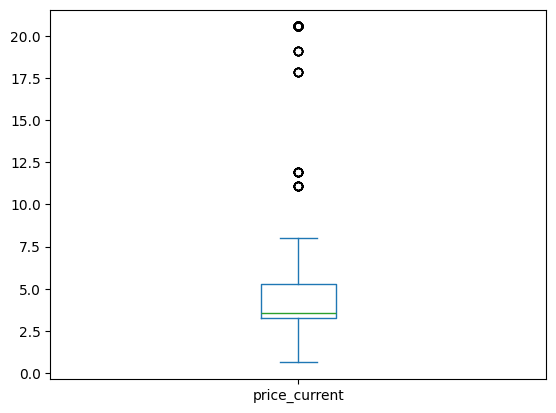

In [ ]:
# Example: Check for outliers in 'price_current' column
import matplotlib.pyplot as plt

combined_data_6['price_current'].plot(kind='box')
plt.show()

# You can then filter out unreasonable values if necessary
combined_data_6 = combined_data_6[combined_data_6['price_current'] > 0]  # Removing negative or zero prices

**2) Check for Outliers in quantity Column:**

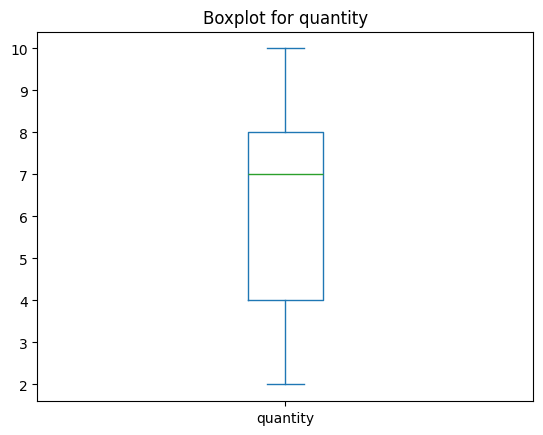

In [ ]:
# Plot a boxplot to check for outliers in 'quantity' column
combined_data_6['quantity'].plot(kind='box')
plt.title('Boxplot for quantity')
plt.show()

# Remove unreasonable values (e.g., negative quantities)
combined_data_6 = combined_data_6[combined_data_6['quantity'] > 0]

**3. Check for Outliers in sales Column:**

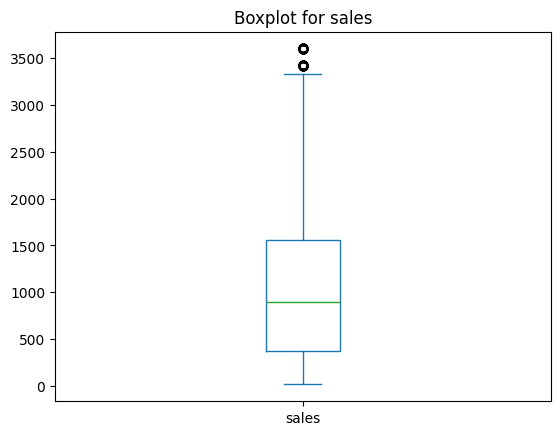

In [ ]:
# Plot a boxplot to check for outliers in 'sales' column
combined_data_6['sales'].plot(kind='box')
plt.title('Boxplot for sales')
plt.show()

# Remove unreasonable values (e.g., negative sales values)
combined_data_6 = combined_data_6[combined_data_6['sales'] >= 0]

**4. Check for Outliers in discount_x Column:**

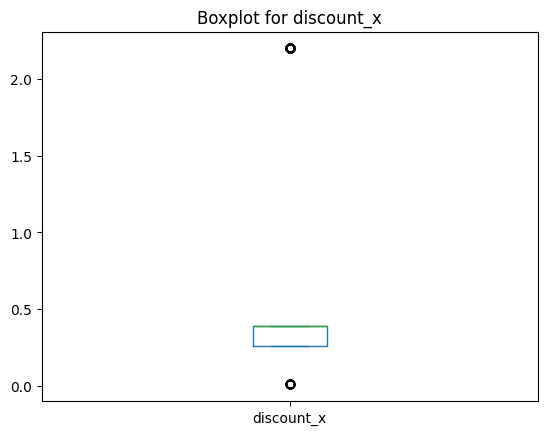

In [ ]:
# Plot a boxplot to check for outliers in 'discount_x' column
combined_data_6['discount_x'].plot(kind='box')
plt.title('Boxplot for discount_x')
plt.show()

# Remove unreasonable values (e.g., negative or excessive discounts)
combined_data_6 = combined_data_6[combined_data_6['discount_x'] >= 0]  # You can define a maximum discount if needed

**5. Check for Outliers in product_base_margin Column:**

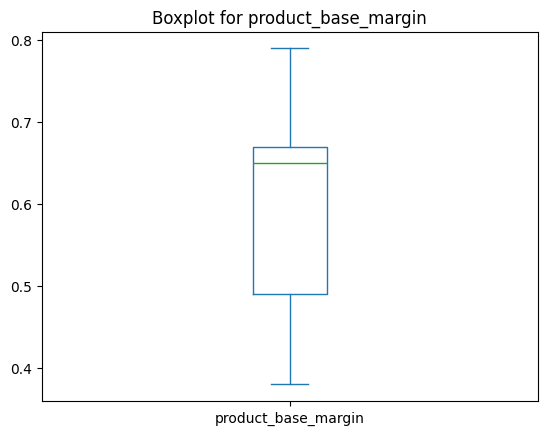

In [ ]:
# Plot a boxplot to check for outliers in 'product_base_margin' column
combined_data_6['product_base_margin'].plot(kind='box')
plt.title('Boxplot for product_base_margin')
plt.show()

# Remove unreasonable values (e.g., negative margins)
combined_data_6 = combined_data_6[combined_data_6['product_base_margin'] >= 0]

**6. Check for Outliers in initial_price Column:**

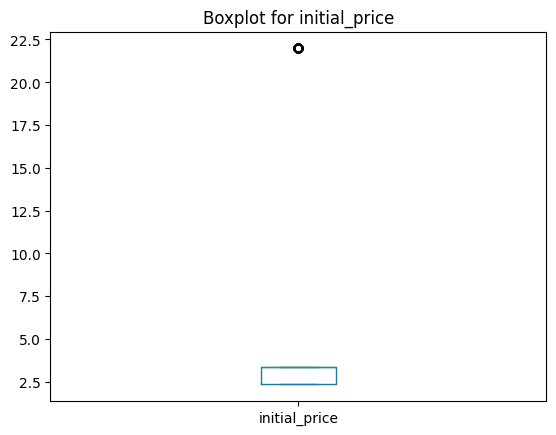

In [ ]:
# Plot a boxplot to check for outliers in 'initial_price' column
combined_data_6['initial_price'].plot(kind='box')
plt.title('Boxplot for initial_price')
plt.show()

# Remove unreasonable values (e.g., negative prices)
combined_data_6 = combined_data_6[combined_data_6['initial_price'] > 0]

**7. Check for Negative Values in shipping_cost:**

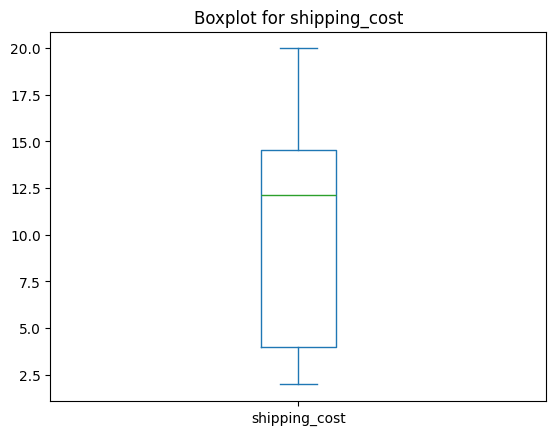

In [ ]:
# Plot a boxplot to check for outliers in 'shipping_cost' column
combined_data_6['shipping_cost'].plot(kind='box')
plt.title('Boxplot for shipping_cost')
plt.show()

# Remove unreasonable values (e.g., negative shipping costs)
combined_data_6 = combined_data_6[combined_data_6['shipping_cost'] >= 0]

**8. Check for Negative or Zero price_retail:**

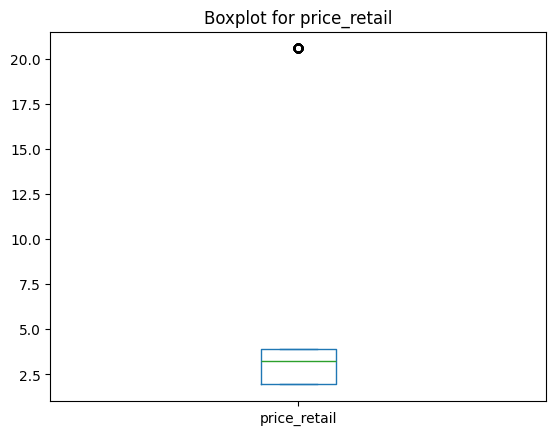

In [ ]:
# Plot a boxplot to check for outliers in 'price_retail' column
combined_data_6['price_retail'].plot(kind='box')
plt.title('Boxplot for price_retail')
plt.show()

# Remove unreasonable values (e.g., negative or zero prices)
combined_data_6 = combined_data_6[combined_data_6['price_retail'] > 0]

In [ ]:
combined_data_6.shape

(676, 90)

In [ ]:
combined_data_6.columns

Index(['index', 'shipping_location', 'department', 'category', 'sku',
       'product_url', 'brand_x', 'price_retail', 'price_current',
       'product_size', 'promotion', 'rundate', 'tid', 'timestamp', 'url',
       'final_price', 'currency', 'gtin', 'specifications', 'image_urls',
       'top_reviews', 'rating_stars', 'related_pages',
       'available_for_delivery', 'available_for_pickup', 'brand_y',
       'category_ids', 'review_count', 'description', 'product_id',
       'review_tags', 'category_url', 'category_name', 'category_path',
       'root_category_url', 'root_category_name', 'upc', 'tags', 'main_image',
       'rating', 'unit_price', 'unit', 'aisle', 'free_returns', 'sizes',
       'colors', 'seller', 'other_attributes', 'customer_reviews',
       'ingredients', 'initial_price', 'discount_x', 'ingredients_full',
       'categories', 'invoice_id', 'branch', 'city_x', 'customer_type',
       'gender', 'product_line', 'unit_price', 'quantity', 'date', 'time',
       'paymen

**Handling errors in Snowflake integration**

In [ ]:
# Drop the duplicate columns
combined_data_6 = combined_data_6.loc[:, ~combined_data_6.columns.duplicated()]

 the rating_stars column are not clean and contain strings in a dictionary-like format (e.g., {"five_stars":366, "four_stars":52,...}).

In [ ]:
import ast

# Apply a function to extract the numeric values from the dictionary-like string
def extract_rating_stars(rating_str):
    try:
        # Convert the string representation of the dictionary into an actual dictionary
        rating_dict = ast.literal_eval(rating_str)
        # You can extract a specific rating (e.g., 'five_stars') or aggregate them
        return rating_dict.get('five_stars', 0)  # Example: return 'five_stars' count
    except Exception as e:
        # In case of error (e.g., badly formatted string), return NaN or a default value
        return None

# Apply the function to clean the 'rating_stars' column
combined_data_6['rating_stars'] = combined_data_6['rating_stars'].apply(extract_rating_stars)

# Convert the cleaned column to integer (if needed)
combined_data_6['rating_stars'] = combined_data_6['rating_stars'].astype(int)


<ipython-input-511-a75a268511a0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_6['rating_stars'] = combined_data_6['rating_stars'].apply(extract_rating_stars)
<ipython-input-511-a75a268511a0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_6['rating_stars'] = combined_data_6['rating_stars'].astype(int)


In [ ]:
combined_data_6.sales

,sales
0,158.04
1,1383.20
2,1388.91
3,1146.41
4,3197.45
...,...
1601,416.39
1602,372.09
1603,795.52
1604,378.08


**error3: Timestamp '16:42:00' is not recognized**

In [ ]:
import pandas as pd

# Convert the 'TIME' column to proper time format (if it's in string format)
# combined_data_6['time'] = pd.to_datetime(combined_data_6['time'], format='%H:%M:%S', errors='coerce').dt.time

# If you want to handle errors by coercing invalid times to NaT (Not a Time), you can check for NaT values
# and handle them accordingly
# invalid_times = combined_data_6[combined_data_6['time'].isna()]
# print(invalid_times)

**Timestamp '16:42:00' is not recognized**

In [ ]:
# combined_data_6['time'] = pd.to_datetime(combined_data_6['time'], format='%H:%M:%S', errors='coerce').dt.time

In [ ]:
# Optionally handle missing time values by filling them with a default value or dropping them
# combined_data_6['time'] = combined_data_6['time'].fillna('00:00:00')  # Filling with a default time

Droppin time column because all rows have same values

In [ ]:
combined_data_6 = combined_data_6.drop(columns=['time'])

In [ ]:
combined_data_6.shape

(676, 87)

In [ ]:
print(combined_data_6.columns)

Index(['index', 'shipping_location', 'department', 'category', 'sku',
       'product_url', 'brand_x', 'price_retail', 'price_current',
       'product_size', 'promotion', 'rundate', 'tid', 'timestamp', 'url',
       'final_price', 'currency', 'gtin', 'specifications', 'image_urls',
       'top_reviews', 'rating_stars', 'related_pages',
       'available_for_delivery', 'available_for_pickup', 'brand_y',
       'category_ids', 'review_count', 'description', 'product_id',
       'review_tags', 'category_url', 'category_name', 'category_path',
       'root_category_url', 'root_category_name', 'upc', 'tags', 'main_image',
       'rating', 'unit_price', 'unit', 'aisle', 'free_returns', 'sizes',
       'colors', 'seller', 'other_attributes', 'customer_reviews',
       'ingredients', 'initial_price', 'discount_x', 'ingredients_full',
       'categories', 'invoice_id', 'branch', 'city_x', 'customer_type',
       'gender', 'product_line', 'quantity', 'date', 'payment', 'city_y',
       'custome

In [ ]:
combined_data_6.shape

(676, 87)

# **Load**

Saving your combined_data_6 dataset into CSV formats.

In [ ]:
# Save dataset as a CSV file
combined_data_6.to_csv('combined_data_6.csv', index=False)

In [1]:
!pip install azure-storage-blob pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.4/408.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 6.6 MB/s eta 0:00:00


In [ ]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
from io import StringIO

STORAGE_ACCOUNT_NAME = 'snowazureintegration'
STORAGE_ACCOUNT_KEY = '************'
CONTAINER_NAME = 'inventory'
BLOB_NAME = 'inventory.csv'
CONNECTION_STRING = f'DefaultEndpointsProtocol=https;AccountName={STORAGE_ACCOUNT_NAME};AccountKey={STORAGE_ACCOUNT_KEY};EndpointSuffix=core.windows.net'

# Connect to Azure Blob Storage
blob_service_client = BlobServiceClient.from_connection_string(CONNECTION_STRING)
container_client = blob_service_client.get_container_client(CONTAINER_NAME)

# Check if the container exists or create it
try:
    container_client.create_container()
    print(f"Container '{CONTAINER_NAME}' created.")
except Exception as e:
    print(f"Container '{CONTAINER_NAME}' already exists or could not be created: {e}")

# Upload the CSV data to the blob
blob_client = blob_service_client.get_blob_client(container=CONTAINER_NAME, blob=BLOB_NAME)

try:
    blob_client.upload_blob(combined_data_6.csv, overwrite=True)
    print(f"Dataframe uploaded successfully to '{CONTAINER_NAME}/{BLOB_NAME}'")
except Exception as e:
    print(f"Error uploading blob: {e}")